<a target="_blank" href="https://colab.research.google.com/github/olsenlabmit/Polymer-Ensemble-Similarity/blob/main/notebook/Example4_Polymer_Ensembles_Represented_by_Experimental_Molecular_Mass_Distributions_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
# @title Copyright & License (click to expand)

#MIT License

#Copyright (c) 2023 olsenlabmit

#Permission is hereby granted, free of charge, to any person obtaining a copy
#of this software and associated documentation files (the "Software"), to deal
#in the Software without restriction, including without limitation the rights
#to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
#copies of the Software, and to permit persons to whom the Software is
#furnished to do so, subject to the following conditions:

#The above copyright notice and this permission notice shall be included in all
#copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
#IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
#AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
#LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
#OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
#SOFTWARE.

# Download the necessary local functions, tables, and dataset

In [1]:
!gdown --folder https://drive.google.com/drive/folders/1DQ6e2Sgi4VlrA47KPYltN8zOJAvKt-jH?usp=sharing -O .

Retrieving folder list
Retrieving folder 1y8WkEeK5TmfETggrRyh5QFeyLOt1AMkU dataset
Retrieving folder 1N1CMgZsatgNQQWQm_r22G0q_vDHYAAPD Example1
Retrieving folder 1W2VPS3-ho_FQwF0y-R0nG7U-wxWd_lFz Ensemble_P
Processing file 14xH4Z1WczHGv8N8aw0RQy0pMUstgkC1X p1_graph.txt
Processing file 1iLvUezZgJSVmzFCzjnZY0J3NWWf5ab5i p2_graph.txt
Retrieving folder 1oUsv9K7PxWC75w5DZmnF_70sL9cG5z25 Ensemble_Q
Processing file 1xlpCSJHciMvPiWVMpvH31OA_4cRKGYm5 q1_graph.txt
Processing file 1vKMfC7XSuyLU8igAl6H6oMzRc1cKDN7j q2_graph.txt
Retrieving folder 18ILq0de8AyYf8gqWWt7-fJrMivHDg1JI Example3
Retrieving folder 1Etb9fDQJHNECgjhNJ7INWGiuhj5sdsIL SP_GED
Processing file 1KDS7Lu-ni_1me0GXFqZQhAIMa36I-mNo SP1_SP2_GED.npy
Processing file 1OpZdG7nwuWzQg8wM1TmkEos6skXoiqQs SP1_SP3_GED.npy
Processing file 1DIgppg1KwcE28aYr7JH16kzHc4Xv2F7u SP1_SP4_GED.npy
Processing file 1yq40E9kOXoPXe99mCWGx45mWhDWGFbGV SP1_SP5_GED.npy
Processing file 1RKEyfIAbz60IoCYxQYjyQ6GQgGeo3--8 SP1_SP6_GED.npy
Processing file 1r_nxNuoIhfb

# Import the required library

In [2]:
import random
import numpy as np
import shutil
import sys
import os.path
import json
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert shutil.which("pyomo")

from pyomo.environ import *

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert shutil.which("cbc") or os.path.isfile("cbc")

print("Import Library Done!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 120893 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3

# Load the Ensembles of Example 3




In [3]:
data_constant_rate_addition = pd.read_excel("./dataset/Example4/ConstantRateAdditions.xlsx")
data_linearramp_addition = pd.read_excel("./dataset/Example4/Linearrampadditions.xlsx")
data_exponentialramp_addition = pd.read_excel("./dataset/Example4/ExpRampAdditions.xlsx")

In [4]:
MMD_x_C_40 = np.array(pow(10, (-0.47)*
        data_constant_rate_addition["Chromatogram RI (159)"]+10.92 ))[1927:3478]
MMD_y_C_40_signal = np.array(data_constant_rate_addition["40 min"])[1927:3478]
MMD_y_C_40 = MMD_y_C_40_signal/MMD_x_C_40

MMD_x_C_60 = np.array(pow(10, (-0.47)*
        data_constant_rate_addition["Chromatogram RI (159)"]+10.92 ))[1800:3660]
MMD_y_C_60_signal = np.array(data_constant_rate_addition["60 min"])[1800:3660]
MMD_y_C_60 = MMD_y_C_60_signal/MMD_x_C_60

MMD_x_L_40 = np.array(pow(10, (-0.47)*
        data_linearramp_addition["Chromatogram RI (163)"]+10.92 ))[1768:3451]
MMD_y_L_40_signal = np.array(data_linearramp_addition["40 min"])[1768:3451]
MMD_y_L_40 = MMD_y_L_40_signal/MMD_x_L_40

MMD_x_L_60 = np.array(pow(10, (-0.47)*
        data_linearramp_addition["Chromatogram RI (163)"]+10.92 ))[1597:3540]
MMD_y_L_60_signal = np.array(data_linearramp_addition["60 min"])[1597:3540]
MMD_y_L_60 = MMD_y_L_60_signal/MMD_x_L_60

MMD_x_E_40 = np.array(pow(10, (-0.47)*
        data_exponentialramp_addition["Chromatogram RI (161)"]+10.92 ))[1785:3269]
MMD_y_E_40_signal = np.array(data_exponentialramp_addition["40 min"])[1785:3269]
MMD_y_E_40 = MMD_y_E_40_signal/MMD_x_E_40

MMD_x_E_60 = np.array(pow(10, (-0.47)*
        data_exponentialramp_addition["Chromatogram RI (161)"]+10.92 ))[1647:3357]
MMD_y_E_60_signal = np.array(data_exponentialramp_addition["60 min"])[1647:3357]
MMD_y_E_60 = MMD_y_E_60_signal/MMD_x_E_60


# Visualize Ensembles

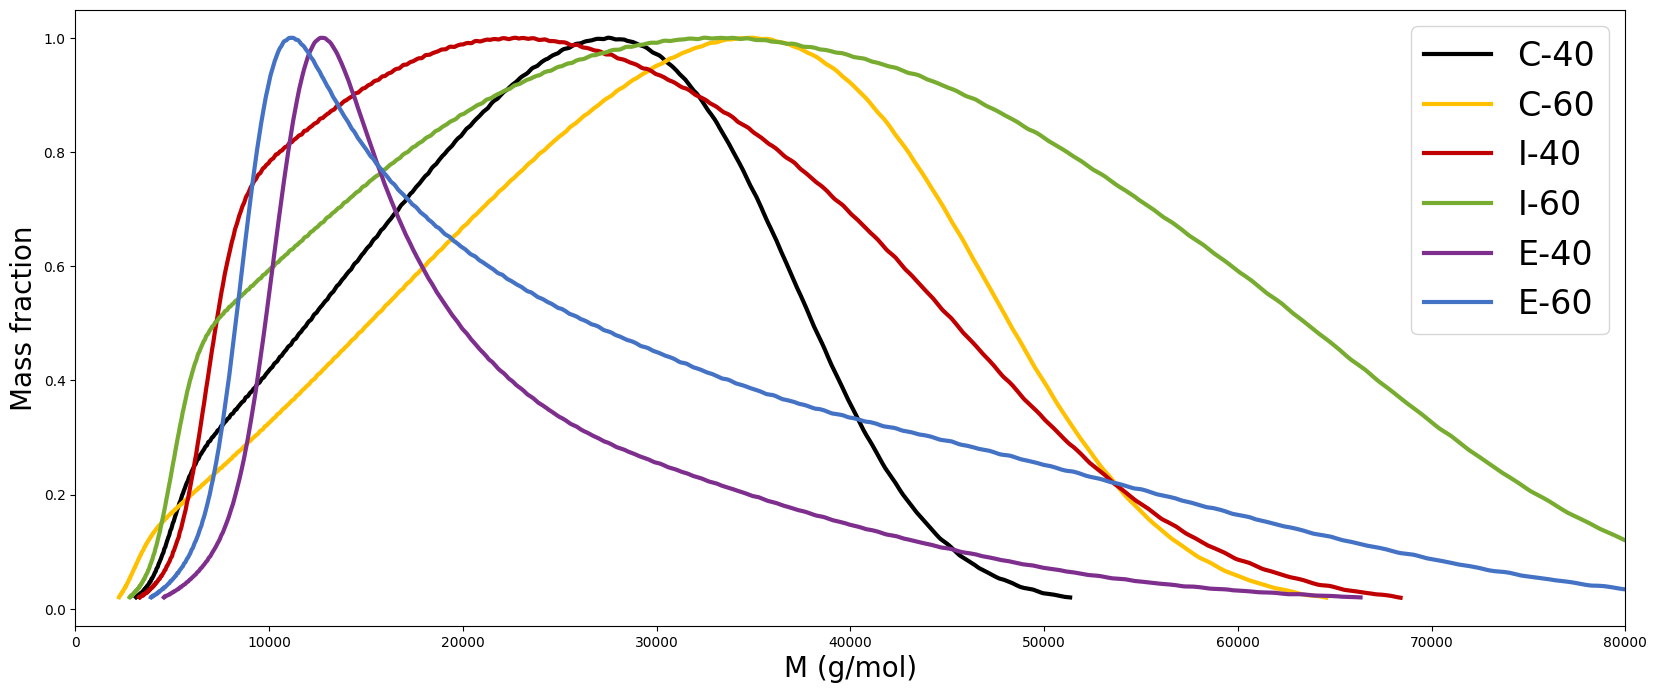

In [5]:
plt.figure(figsize = (20,8))

plt.plot(MMD_x_C_40, MMD_y_C_40_signal/max(MMD_y_C_40_signal),
         c='k', label="C-40",lw=3)
plt.plot(MMD_x_C_60, MMD_y_C_60_signal/max(MMD_y_C_60_signal),
         c='#FFC000', label="C-60",lw=3)


plt.plot(MMD_x_L_40, MMD_y_L_40_signal/max(MMD_y_L_40_signal),
         c='#C00000',label="I-40",lw=3)
plt.plot(MMD_x_L_60, MMD_y_L_60_signal/max(MMD_y_L_60_signal),
         c='#77AC30',label="I-60",lw=3)


plt.plot(MMD_x_E_40, MMD_y_E_40_signal/max(MMD_y_E_40_signal),
         c='#7E2F8E',label="E-40",lw=3)
plt.plot(MMD_x_E_60, MMD_y_E_60_signal/max(MMD_y_E_60_signal),
         c='#4472C4',label="E-60",lw=3)

plt.xlim(0,80000)
plt.legend(fontsize=24)
plt.xlabel("M (g/mol)", size = 20)
plt.ylabel("Mass fraction",size = 20)
plt.show()

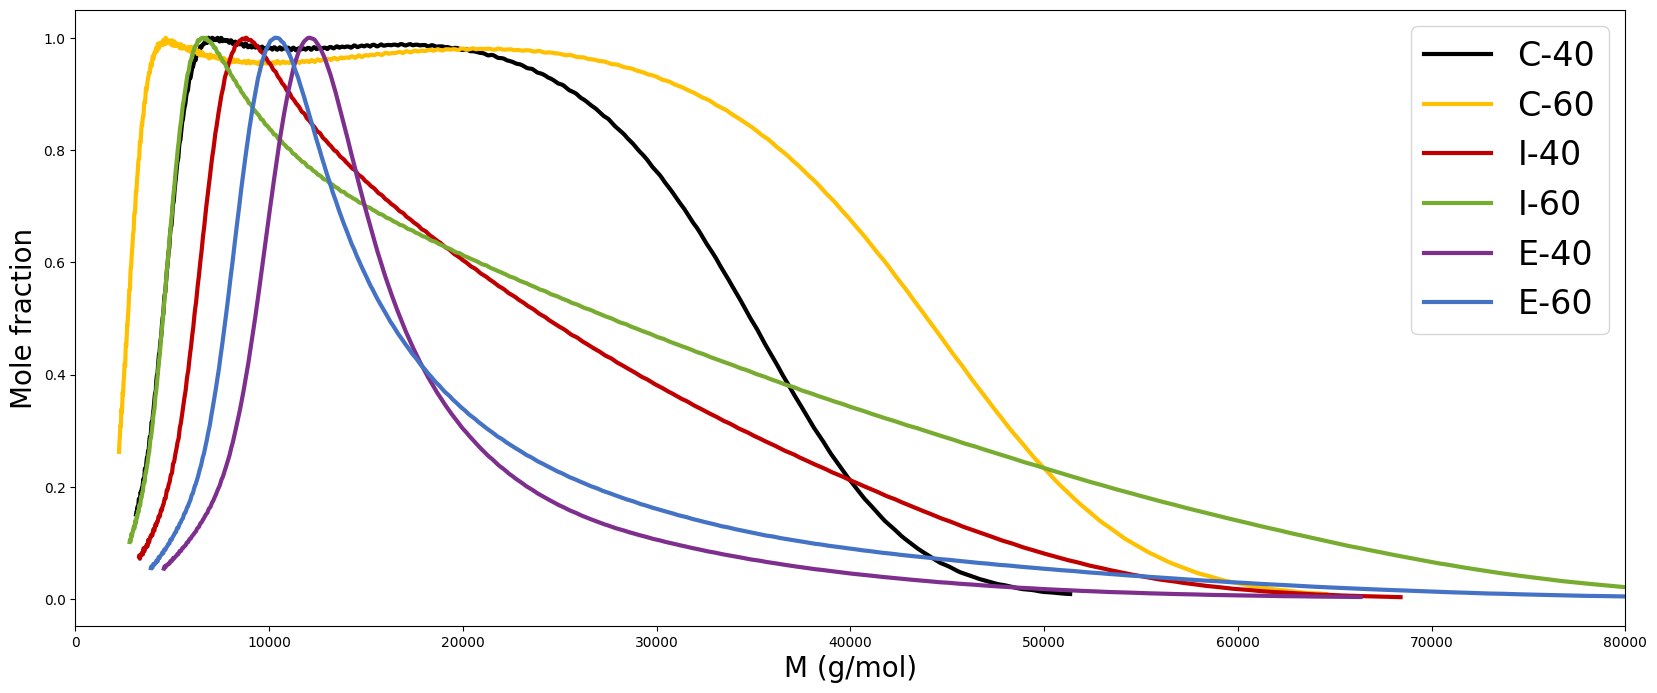

In [6]:
plt.figure(figsize = (20,8))

plt.plot(MMD_x_C_40, MMD_y_C_40/max(MMD_y_C_40),
         c='k', label="C-40",lw=3)
plt.plot(MMD_x_C_60, MMD_y_C_60/max(MMD_y_C_60),
         c='#FFC000', label="C-60",lw=3)


plt.plot(MMD_x_L_40, MMD_y_L_40/max(MMD_y_L_40),
         c='#C00000',label="I-40",lw=3)
plt.plot(MMD_x_L_60, MMD_y_L_60/max(MMD_y_L_60),
         c='#77AC30',label="I-60",lw=3)


plt.plot(MMD_x_E_40, MMD_y_E_40/max(MMD_y_E_40),
         c='#7E2F8E',label="E-40",lw=3)
plt.plot(MMD_x_E_60, MMD_y_E_60/max(MMD_y_E_60),
         c='#4472C4',label="E-60",lw=3)

plt.xlim(0,80000)
plt.legend(fontsize=24)
plt.xlabel("M (g/mol)", size = 20)
plt.ylabel("Mole fraction",size = 20)
plt.show()


In [11]:
def distribution_approximate_distance(x1,x2,alpha=1):
    end_group_mass = 57.070425287999996
    repeat_unit_mass = 104.062600256

    dp1 = (x1-end_group_mass)/repeat_unit_mass
    dp2 = (x2-end_group_mass)/repeat_unit_mass

    gap_dp = abs(dp1-dp2)

    GED = gap_dp*2

    NGED = GED/((dp1+1 + dp2+1 )/2)

    distance_score = 1-np.exp(-alpha*NGED)

    return distance_score

# EMD function

In [12]:
def Calculate_EMD(ensembleP = None,
                  ensembleP_weight = None,
                  ensembleQ = None,
                  ensembleQ_weight = None,
                  alpha = 1,
                  print_details = False
                         ):

    Demand = {}
    Supply = {}
    T = {}

    ensembleP_number = len(ensembleP_weight)

    ensembleP_weight_sum = sum(ensembleP_weight)

    for i in range(0, ensembleP_number):

            Demand["P" + str(i+1)] = ensembleP_weight[i]/ensembleP_weight_sum

    ensembleQ_number = len(ensembleQ_weight)

    ensembleQ_weight_sum = sum(ensembleQ_weight)

    for j in range(0, ensembleQ_number):

            Supply["Q" + str(j+1)]= ensembleQ_weight[j]/ensembleQ_weight_sum

    for i in range(0,ensembleP_number):

        for j in range(0, ensembleQ_number):

            T[("P"+str(i+1),"Q"+str(j+1))] = distribution_approximate_distance(ensembleP[i], ensembleQ[j],alpha)

    # Step 0: Create an instance of the model
    model = ConcreteModel()
    model.dual = Suffix(direction=Suffix.IMPORT)

    # Step 1: Define index sets
    CUS = list(Demand.keys())
    SRC = list(Supply.keys())

    # Step 2: Define the decision
    model.x = Var(CUS, SRC, domain = NonNegativeReals)

    # Step 3: Define Objective
    model.Cost = Objective(
    expr = sum([T[c,s]*model.x[c,s] for c in CUS for s in SRC]),
    sense = minimize)

    # Step 4: Constraints
    model.src = ConstraintList()
    for s in SRC:
        model.src.add(sum([model.x[c,s] for c in CUS]) <= Supply[s])

    model.dmd = ConstraintList()
    for c in CUS:
        model.dmd.add(sum([model.x[c,s] for s in SRC]) == Demand[c])

    results = SolverFactory('cbc').solve(model)

    if 'ok' == str(results.Solver.status):
        if print_details == True:
            for s in SRC:
                for c in CUS:
                    if model.x[c,s]() > 0:
                        print("Ship from ", s," to ", c, ":",
                              model.x[c,s](),"*" ,T[c,s])
        return model.Cost()

    else:
        print("No Valid Solution Found")
        return False

# The calculation of EMD and S

## The calculation of EMD and S between C-40 and C-60

This step will take about 30 minutes.

In [41]:
EMD_C_40_C_60 = Calculate_EMD(
      ensembleP = MMD_x_C_40,
      ensembleP_weight = MMD_y_C_40,
      ensembleQ = MMD_x_C_60,
      ensembleQ_weight = MMD_y_C_60,
      alpha = 1,
      print_details = False)

print("EMD(C-40,C-60) = ", EMD_C_40_C_60)
print("S(C-40,C-60) = ", 1-EMD_C_40_C_60)

EMD(C-40,C-60) =  0.1476637363902301
S(C-40,C-60) =  0.8523362636097699


## The calculation of EMD and S matrix for all the pairs of these six MMDs.

The calculation may take a very long time. We also provide the calculated similarity matrix, you can directly skip this step if you just want to see the results.

In [ ]:
# @title Calculations of S matrix for MMDs (click to expand)

Example4_Ensembles = [MMD_x_C_40,
                      MMD_x_C_60,
                      MMD_x_L_40,
                      MMD_x_L_60,
                      MMD_x_E_40,
                      MMD_x_E_60]

Example4_Ensembles_weights = [MMD_y_C_40,
                              MMD_y_C_60,
                              MMD_y_L_40,
                              MMD_y_L_60,
                              MMD_y_E_40,
                              MMD_y_E_60]

Example4_Ensembles_name = ["C-40",
                           "C-60",
                           "L-40",
                           "L-60",
                           "E-40",
                           "E-60"]

S_matrix = np.ones([6,6])

for i in range(0,5):

    for j in range(i+1,6):

        EMD_ij = Calculate_EMD(ensembleP = Example4_Ensembles[i],
                         ensembleP_weight = Example4_Ensembles_weights[i],
                         ensembleQ = Example4_Ensembles[j],
                         ensembleQ_weight = Example4_Ensembles_weights[j],
                         alpha = 1,
                         print_details = False)

        S_ij = 1-EMD_ij

        print(f"EMD({Example4_Ensembles_name[i]},{Example4_Ensembles_name[j]})=",
              EMD_ij)
        print(f"S({Example4_Ensembles_name[i]},{Example4_Ensembles_name[j]})=",
              S_ij)
        print('\n')

        S_matrix[i,j] = S_ij
        S_matrix[j,i] = S_ij


## The result of the pairwise ensemble similarity for these polymer molecular mass distributions.

In [9]:
# @title Load the stored results of S matrix for MMDs if you do not have time to wait the above calculations(click to expand)

S_matrix = np.load("./dataset/Example4/Example4_S_matrix.npy")


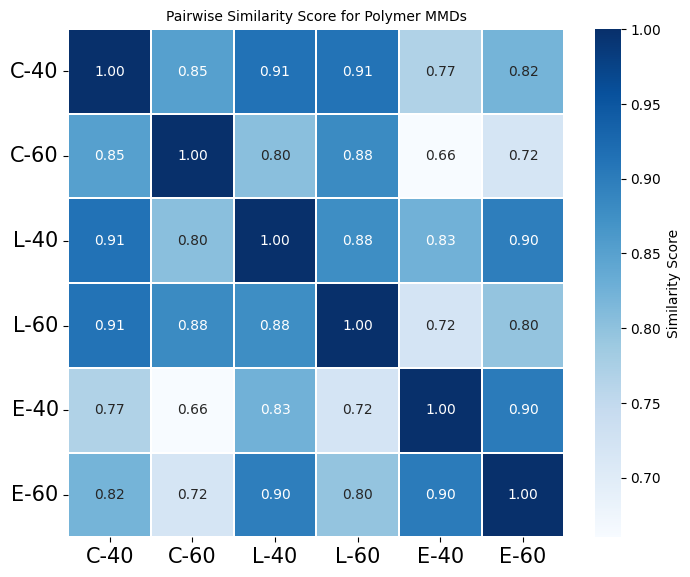

In [10]:
fig, ax = plt.subplots(figsize=(8,6.6),sharey=True )

x_labels = ["C-40", "C-60", "L-40", "L-60", "E-40", "E-60"]
y_labels = ["C-40", "C-60", "L-40", "L-60", "E-40", "E-60"]

sns.heatmap(S_matrix, linewidth = 0.3, annot = True, fmt = ".2f" , cmap = "Blues",
            cbar_kws = {'label': 'Similarity Score'})
ax.set_title(r"Pairwise Similarity Score for Polymer MMDs", fontsize=10)
ax.set_xticklabels(x_labels, rotation = 0, fontsize = 15,
                   horizontalalignment = 'center')
ax.set_yticklabels(y_labels, rotation = 360, fontsize = 15,
                   horizontalalignment = 'right')

plt.show()